# Assignment 7

For this assignment, I am going to be exploring the NYC Taxi Cab dataset and generate data visualizations that compare how certain trends changed between the year before the pandemic and the first year of the pandemic, ie. 2019 vs. 2020.

In [2]:
%%configure -f
{
    "conf": {
        "spark.pyspark.python": "python3",
        "spark.pyspark.virtualenv.enabled": "true",
        "spark.pyspark.virtualenv.type":"native",
        "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
    }
}

In [3]:
sc.install_pypi_package("boto3==1.19.2")
sc.install_pypi_package("pandas==1.0.5")
sc.install_pypi_package("scipy==1.4.1")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.1")

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1683757773393_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
df_2019 = spark.read.parquet('s3://nyc-tlc/trip data/yellow_tripdata_2019*.parquet')
df_2020 = spark.read.parquet('s3://nyc-tlc/trip data/yellow_tripdata_2020*.parquet')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
df_2019.printSchema()

df_2020.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: integer (nullable = true)

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (

### From the number of observations alone, we can already tell tell there is a major difference between 2019 and 2020. There are 84 million rows for 2019, compared to only 24 million for 2020.

In [6]:
# Get total of observations in 2019
df_2019.count()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

84598444

In [7]:
# Get total of observations in 2020
df_2020.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

24649092

## SQL Queries and Data Visualizations

### (1) Top 5 Most Frequent Fare Amounts in 2019 vs. 2020

In [30]:
df_2019.createOrReplaceTempView("taxi")
query_avg_fare = '''
        SELECT AVG(fare_amount), COUNT(*) AS fare_count
        FROM taxi
        GROUP BY fare_amount
        ORDER BY fare_count DESC
        LIMIT 5;
        '''

avg_fare_2019 = spark.sql(query_avg_fare)
avg_fare_2019.show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+----------+
|avg(fare_amount)|fare_count|
+----------------+----------+
|             6.0|   4116811|
|             6.5|   4077603|
|             7.0|   3996131|
|             5.5|   3979971|
|             7.5|   3827545|
+----------------+----------+

In [31]:
df_2020.createOrReplaceTempView("taxi")
avg_fare_2020 = spark.sql(query_avg_fare) 
avg_fare_2020.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+----------+
|avg(fare_amount)|fare_count|
+----------------+----------+
|             6.0|   1297558|
|             6.5|   1270995|
|             5.5|   1261888|
|             7.0|   1242564|
|             5.0|   1172501|
+----------------+----------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

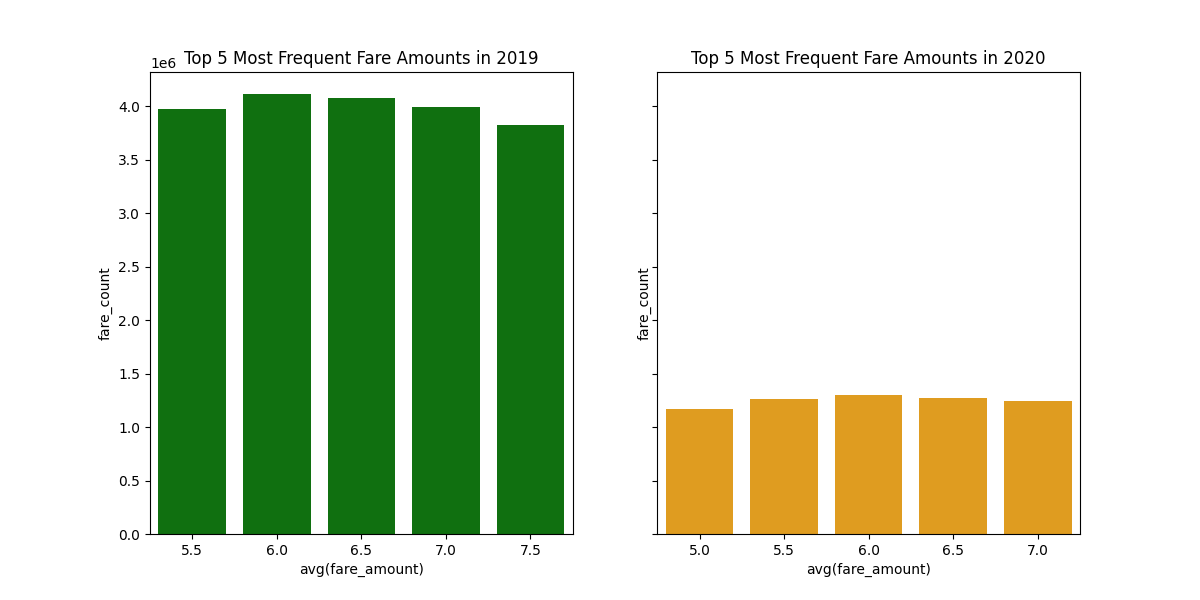

In [44]:
# convert df1 to Pandas DataFrame for plotting
df1 = avg_fare_2019.toPandas()

# convert df2 to Pandas DataFrame for plotting
df2 = avg_fare_2020.toPandas()

# close previous plots
plt.close()

# set up figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

# plot the 2019 bar chart on the left
sns.barplot(x='avg(fare_amount)', y='fare_count', data=df1, ax=axs[0],color='green')
axs[0].set_title('Top 5 Most Frequent Fare Amounts in 2019')

# plot the 2020 bar chart on the right
sns.barplot(x='avg(fare_amount)', y='fare_count', data=df2, ax=axs[1], color='orange')
axs[1].set_title('Top 5 Most Frequent Fare Amounts in 2020')

# display the plots
%matplot plt

### Description

This first visualization compares the 5 most frequent fare amounts in 2019 (green) vs. 2020 (orange). 

By simple visual analysis, the 2020 distribution is orders of magnitude smaller than the 2019 distribution. This is consistent with the pandemic in 2020, in which the strict COVID-19 lockdowns in NYC impeded people from going out and using taxis, in comparison to the previous year. Therefore, the frequencies of fare amounts is lower, as expected.

As to the amounts themselves, they are also lower. In 2019, the top 5 fare amounts range from $ 5.5 to $7.5 compared to $ 5 - $7 in 2020. This probably means that since fewer people were using taxis, the fares were also cheaper.


### (2) Top 5 Most Frequent Tip Amounts in 2019 and 2020

In [27]:
df_2019.createOrReplaceTempView("taxi")
query_top_tip = '''
        SELECT tip_amount, COUNT(*) AS tip_count
        FROM taxi
        GROUP BY tip_amount
        ORDER BY tip_count DESC
        LIMIT 5;
        '''

top_tip_2019 = spark.sql(query_top_tip)
top_tip_2019.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+---------+
|tip_amount|tip_count|
+----------+---------+
|       0.0| 26360701|
|       1.0|  4669003|
|       2.0|  3010546|
|       1.5|  1098023|
|      2.06|  1036268|
+----------+---------+

In [28]:
df_2020.createOrReplaceTempView("taxi")
top_tip_2020 = spark.sql(query_top_tip)
top_tip_2020.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+---------+
|tip_amount|tip_count|
+----------+---------+
|       0.0|  7368621|
|       1.0|  1373765|
|       2.0|   934709|
|      2.75|   481415|
|      2.06|   342562|
+----------+---------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

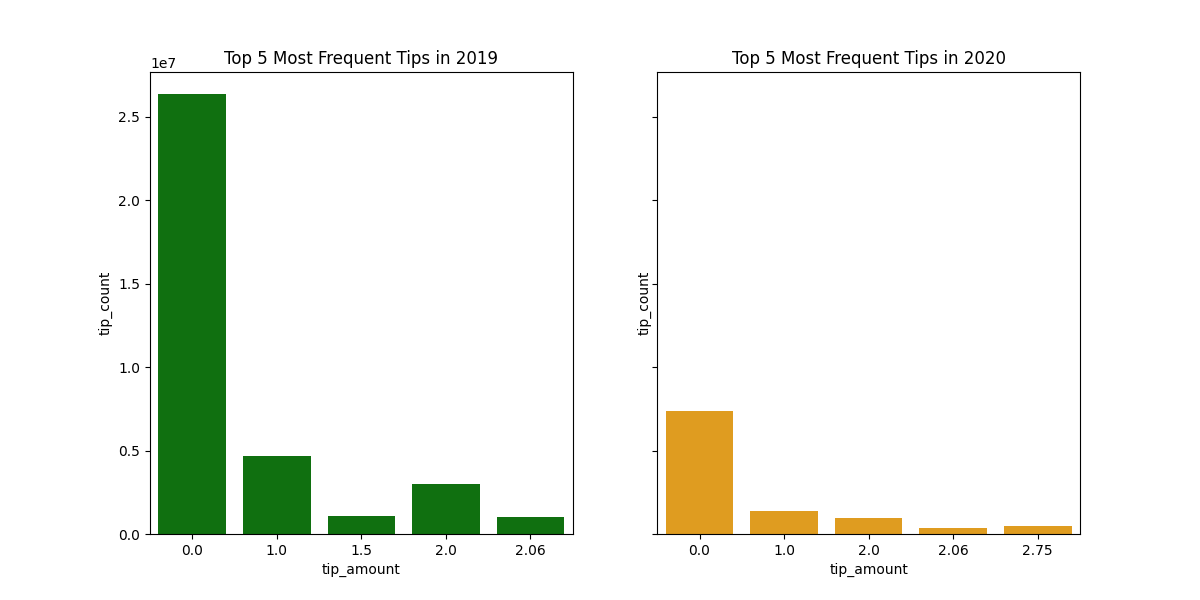

In [49]:
# convert df1 to Pandas DataFrame for plotting
df1 = top_tip_2019.toPandas()

# convert df2 to Pandas DataFrame for plotting
df2 = top_tip_2020.toPandas()

# close previous plots
plt.close()

# set up figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

# plot the 2019 bar chart on the left
sns.barplot(x='tip_amount', y='tip_count', data=df1, ax=axs[0],color='green')
axs[0].set_title('Top 5 Most Frequent Tips in 2019')
# axs[0].set_ylim(0, df1['tip_count'].max()) # Set y-axis limit to the max value

# plot the 2020 bar chart on the right
sns.barplot(x='tip_amount', y='tip_count', data=df2, ax=axs[1],color='orange')
axs[1].set_title('Top 5 Most Frequent Tips in 2020')
# axs[0].set_ylim(0, df1['tip_count'].max()) # Set y-axis limit to the max value

# display the plots
%matplot plt

### Description

In this visualization, there appears to be a drastic difference between 2019 and 2020. It looks like there is a marked fall in the top 5 most frequent amount of tips from the pre-pandemic year to the first pandemic year. 

We can observe that in 2019: 4.6 million people gave \\$1 tips and 9.3 million gave \\$2 tips. In comparison, in 2020, 1.3 million people gave \\$1 tip and 934,000 people gave \\$2 tips. 

To understand whether people are were giving out different amount of tips, we could take out the proportions. Otheriwse, it could simply be the result from a huge fall in the quantity of trips due to the pandemic.

\\$1 tip comparison

- 2019: (4.6 million / 84 million) * 100 = 5.47 % people gave \\$1 tip in 2019
- 2020: (1.3 million / 24 million) * 100 = 5.42 % people gave \\$1 tip in 2020

\\$2 tip comparison

- 2019: (9.3 million / 84 million) * 100 = 11.07 % people gave \\$2 tip in 2019
- 2020: (934,000 / 24 million) * 100 = 3.89 % people gave \\$1 tip in 2020

From this simplistic analysis, it looks like the proportion of people giving \\$1 tips from 2019 to 2020 was similar but the proportion of people giving \\$2 tips did fall from 11.07% in 2019 to 3.89% in 2020. This is also consistent with the pandemic, the economic recession, and falling wages.

### (3) Passenger Count by Pickup Date in 2019 vs. 2020

In [34]:
df_2019.createOrReplaceTempView("taxi")
query_passenger_count = '''
        SELECT SUM(passenger_count) AS total_passenger_count
        FROM taxi
        '''

passenger_2019 = spark.sql(query_passenger_count )
passenger_2019.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------+
|total_passenger_count|
+---------------------+
|         1.31504641E8|
+---------------------+

In [35]:
df_2020.createOrReplaceTempView("taxi")
passenger_2020 = spark.sql(query_passenger_count )
passenger_2020.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------+
|total_passenger_count|
+---------------------+
|          3.4995422E7|
+---------------------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

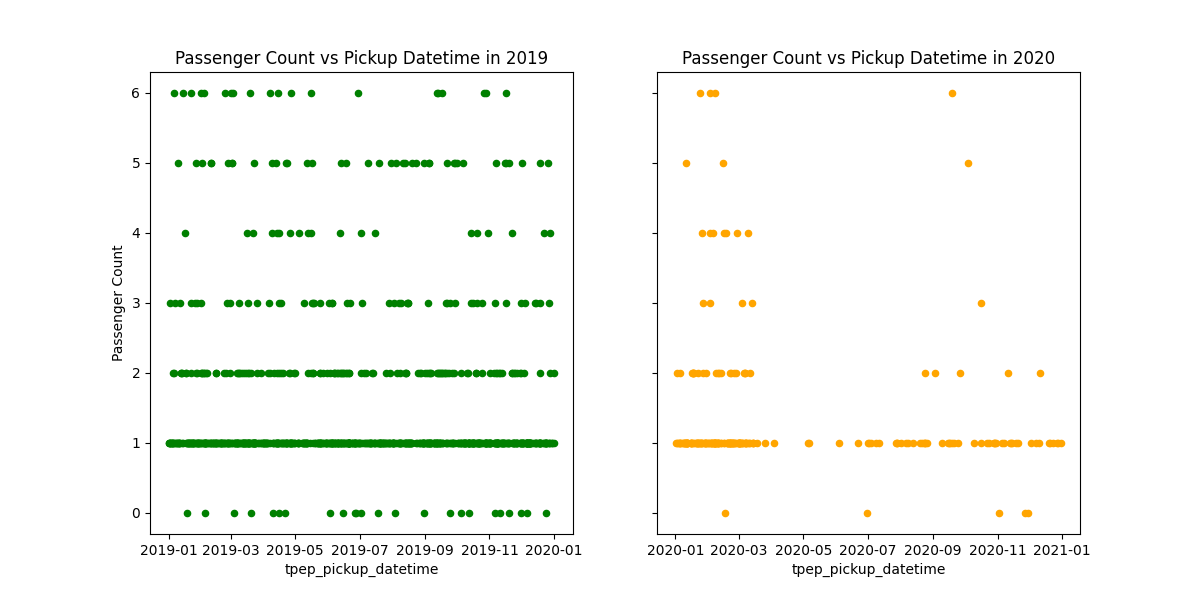

In [26]:
sampled_df_2019 = df_2019.sample(fraction=0.00001)
pdf_sampled_2019 = sampled_df_2019.toPandas()

sampled_df_2020 = df_2020.sample(fraction=0.00001)
pdf_sampled_2020 = sampled_df_2020.toPandas()

# Close previous plots
plt.close()

fig, axs = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

# Scatter plot for 2019
pdf_sampled_2019.plot.scatter('tpep_pickup_datetime', 'passenger_count', title='Passenger Count vs Pickup Datetime in 2019', color='green', ax=axs[0])
axs[0].set_ylabel('Passenger Count')

# Scatter plot for 2020
pdf_sampled_2020.plot.scatter('tpep_pickup_datetime', 'passenger_count', title='Passenger Count vs Pickup Datetime in 2020', color='orange', ax=axs[1])
axs[1].set_ylabel('') # remove y-label for second subplot

%matplot plt

### Description

These two scatterplots show only a small sample of the data. However, it is very easy to see a clear difference in 2020. First, there appears to be a clear gap in passenger count around March 2020 on the chart on the right, the moment when COVID-19 first generated waves internationally, including NYC. There is a clear gap of observations in passenger gap throughout the month, which is consistent with the lockdowns and the panic at the time.

In general, there are also a lot fewer observations for passenger counts throughout 2020 vs. the year before. Another difference is that in 2019 there were more observations for higher counts of passengers in a single taxi cab. With COVID-19 social distancing rules, people avoided sharing cabs with multiple people and the distribution data shows that most of cabs were used by one passenger. Those cabs with 2 passengers were used before March 2020, with some few observations after that and some sporadic cases with more passengers beyond that.

### (4) Payment Types in 2019 vs. 2020

In [7]:
df_2019.createOrReplaceTempView("taxi")
query_payment_type = '''
        SELECT payment_type, COUNT(*) AS payment_type_count
        FROM taxi
        GROUP BY payment_type
        ORDER BY payment_type ASC;
        '''

payment_2019 = spark.sql(query_payment_type)
payment_2019.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+------------------+
|payment_type|payment_type_count|
+------------+------------------+
|           0|            444383|
|           1|          60623614|
|           2|          22896596|
|           3|            447235|
|           4|            186583|
|           5|                33|
+------------+------------------+

In [8]:
df_2020.createOrReplaceTempView("taxi")
payment_2020 = spark.sql(query_payment_type)
payment_2020.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+------------------+
|payment_type|payment_type_count|
+------------+------------------+
|           0|            809967|
|           1|          17463775|
|           2|           6148485|
|           3|            144485|
|           4|             82365|
|           5|                15|
+------------+------------------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

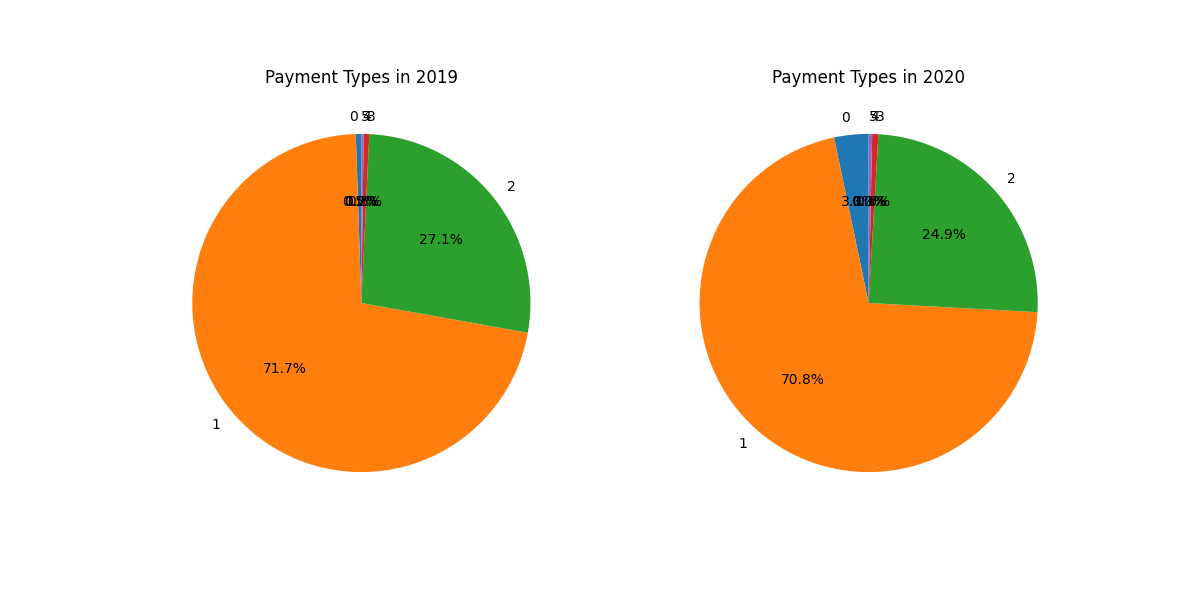

In [9]:
# convert df1 to Pandas DataFrame for plotting
df1 = payment_2019.toPandas()

# convert df2 to Pandas DataFrame for plotting
df2 = payment_2020.toPandas()

# close previous plots
plt.close()

# set up figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# plot the 2019 pie chart on the left
axs[0].pie(df1['payment_type_count'], labels=df1['payment_type'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Payment Types in 2019')

# plot the 2020 pie chart on the right
axs[1].pie(df2['payment_type_count'], labels=df2['payment_type'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Payment Types in 2020')

# display the plots
%matplot plt

### Description

I referenced the NYC Data Dictionary and obtained the following description for each categorical payment value:

- 1 = Credit card 
- 2 = Cash
- 3 = No charge 
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip


In general, the pie charts for payment types look fairly similar for both years. In both cases, the vast majority of payments are done by credit card. I was expecting credit card payments to be even higher in 2020 due to pandemic-related digitization but the proportion is slightly smaller (ie. 70.8% vs. 71.%). 

The second most common payment type, as can be expected, is cash. In 2020, it made up 27.1% of trips and 24.9% of trips in 2020.

The reason why we observe the decline in proportions in both cash and credit payments from 2019 to 2020 is because there is an increase in "no charge" in the data, the blue colored portion. There is no available explanation for why this is the case or under which circumstances there is no charge for a trip but it does seem a bit interesting.

Reference: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf


### (5) Distribution of tips by pickup dates in 2019 vs. 2020

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

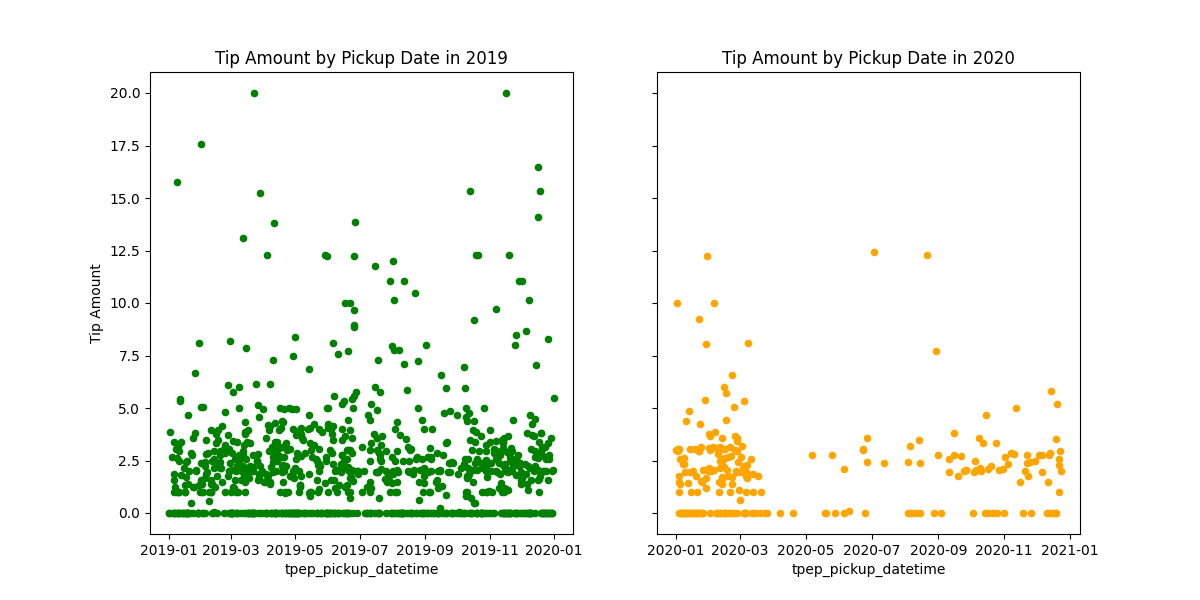

In [45]:
# Close previous plots
plt.close()

fig, axs = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

# Scatter plot for 2019
pdf_sampled_2019.plot.scatter('tpep_pickup_datetime', 'tip_amount', title='Tip Amount by Pickup Date in 2019', color='green', ax=axs[0])
axs[0].set_ylabel('Tip Amount')

# Scatter plot for 2020
pdf_sampled_2020.plot.scatter('tpep_pickup_datetime', 'tip_amount', title='Tip Amount by Pickup Date in 2020', color='orange', ax=axs[1])
axs[1].set_ylabel('') # remove y-label for second subplot

%matplot plt

### Description

Lastly, I wanted to further dig into the tip patterns and see how the distribution might have changed throughout the course of each year. Here, I am also taking a small sample and there is again a very clear gap in the data for the early months of the pandemic that correspond the early lockdowns and periods of uncertainty and reduced mobility.

Visually, the 2020 distribution is much smaller and lighter than the 2019 one. Also, the 2019 distribution seems to be fairly consistent throughout the year, with some peaks at different points. On the other hand, the 2020 scatterplot shows that tips were given before March 2020, where the dots are more concentrated, and they start to be given again towards the end of the year, but never in the same concentration or amounts than in 2019. There also not as many dots at 0 as in 2019, which is indicative that there are a lot fewer data points in the second chart.